## Vamos criar um analisador de sentimentos.

 Um modelo de ML capaz de analisar um determinado texto e classificá-lo de acordo com o sentimento, ouseja, se a pessoa gostou ou não. Para o projeto utilizaremos um dataset do [kaggle](https://www.kaggle.com/datasets/luisfredgs/imdb-ptbr?resource=download)
 O dataset tem vários comentários de usuários do site IMDB, para avaliação de filme. Os sentimentos dados são ou negativo ou positivo. (Ou seja, o modelo será de classificação e supervisionado)
 

# O que é PLN ou NLP:
Em português Processamente de linguagem natural, ou em inglês Natural Language Processing é uma vertente da inteligência artificial (IA) tem como intenção de melhorar a comunicação entre humanos e computadores. Funciona como um 'tradutor'.

Pela linguagem natural não ser uma fonte estruturada como, por exemplo, tabelas e planilhas e possuir coisas como ironia e sarcasmo há grandes desafios para criação de modelo generalizado o suficiente que seja aplicado de forma satisfatória para todas as linguas. 

Principais uso de NLP:
- tradutores online;
- analise de sentimento;
- corretores ortográficos;
- chatbots;
- barra de pesquisa;
entre outros.

#### Etapas:
- Coletar dados;
- limpar;
- estruturar;
- analisar;
- treinar e testar modelos que satisfaçam o problema.

### Importando as bibliotecas:

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
resenha = pd.read_csv('dados/imdb-reviews-pt-br.csv')
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [4]:
resenha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49459 entries, 0 to 49458
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         49459 non-null  int64 
 1   text_en    49459 non-null  object
 2   text_pt    49459 non-null  object
 3   sentiment  49459 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


In [5]:
treino, teste, classe_treino, classe_teste = train_test_split(resenha.text_pt,
                                                             resenha.sentiment,
                                                             random_state = 42)

In [6]:
treino.shape, teste.shape, classe_treino.shape, classe_teste.shape

((37094,), (12365,), (37094,), (12365,))

#### Dando uma olhada:

In [7]:
treino.head()

1348     Embora o filme tenha sido apenas assim, o clos...
27466    Este é provavelmente um dos piores filmes que ...
29998    De vez em quando, um filme irá varrer ao seu r...
48186    Este é um conto completamente diabólico de quã...
26473    Lenta, chata, extremamente repetitiva. Não adm...
Name: text_pt, dtype: object

In [8]:
classe_treino.head()

1348     neg
27466    neg
29998    neg
48186    pos
26473    neg
Name: sentiment, dtype: object

In [9]:
teste.head()

12532    Isso era incomum: um filme moderno que era ult...
35445    Alguns dos meus velhos amigos sugeriram que eu...
20279    Que prazer. Isto é realmente uma paródia. Some...
2969     Há cerca de dez minutos a meio da Strangeland,...
45161    Otelo, a clássica história de Shakespearen sob...
Name: text_pt, dtype: object

In [10]:
classe_teste.head()

12532    pos
35445    neg
20279    pos
2969     neg
45161    pos
Name: sentiment, dtype: object

### Fazendo a classificação com o Sklearn

In [11]:
# regressao_logistica = LogisticRegression()
# regressao_logistica.fit(treino, classe_treino)
# acuracia = regressao_logistica.score(teste,classe_teste)
# print(acuracia)

# Dá erro pois o modelo não interpreta dados textuais (ValueError: could not convert string to float:)

#### Dando uma olhada em um exemplo de mensagem com sentimento negativo e positivo:

In [12]:
print("Negativa \n")
print(resenha.text_pt[189])  #vimos que os negativos estavam no começo

Negativa 

Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.


In [13]:
print("Positiva \n")
print(resenha.text_pt[49002])

Positiva 

Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo maio

Conhecendo um pouco dos textos dá pra prestar atenção em palavras que poderiam ser indicativos de sentimentos e comuns nos textos usados. 
Como exemplo no do primeiro a palavra pior  e na segunda a palavra brilhante.

In [14]:
print(resenha.sentiment.value_counts())

neg    24765
pos    24694
Name: sentiment, dtype: int64


Os valores estão bem balanceados então não terá problema de viés para a classificação.

### Alterando os valores da coluna sentiment por valores binários:

- neg = 0
- pos = 1


In [15]:
classificacao = resenha['sentiment'].replace(['neg','pos'],[0,1])

In [16]:
resenha['classificacao'] = classificacao

In [17]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [18]:
resenha.tail()

,id,text_en,text_pt,sentiment,classificacao
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1
49458,49460,Working-class romantic drama from director Mar...,O drama romântico da classe trabalhadora do di...,pos,1


### Sacola de Palavras ou Bag of words:
Passo onde permite contar todas as palavras em um pedaço de texto. Baseia-se na criação de uma matriz de ocorrência de palavras para a sentença, não leva em conta a estrutura (gramática) nem a ordem das palavras. As frequências ou ocorrências de palavras são usadas para comparação de diferentes documentos e avalia suas similariedades para aplicação

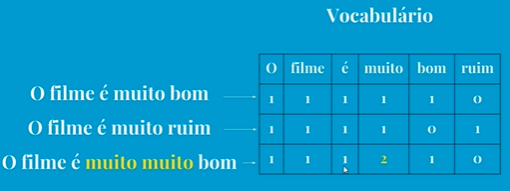

Criamos um vocabulário. Seria basicamente separar todas as palavras de um comentário e agrupar as palavras repetidas. 

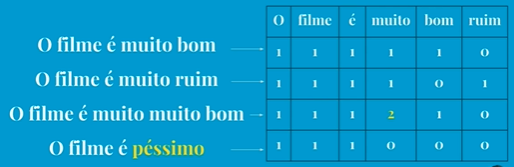
A matriz criada, no entanto, não é muito eficiente pois ocupa muito espaço na memória para armazená-la.

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ["Assisti um filme ótimo", "Assisti um filme ruim"]

vetorizar = CountVectorizer()
bag_of_words = vetorizar.fit_transform(texto)

[Documentação Scikitlearn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

In [20]:
vetorizar.get_feature_names_out()  # lowercaser=True 

array(['assisti', 'filme', 'ruim', 'um', 'ótimo'], dtype=object)

In [21]:
print(bag_of_words.toarray())

[[1 1 0 1 1]
 [1 1 1 1 0]]


In [22]:
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [23]:
print(bag_of_words.shape)

(2, 5)


#### Para visualização:

In [24]:
matriz =  pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())

"Assisti um filme ótimo"

"Assisti um filme ruim"

In [25]:
matriz

,assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [26]:
vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(resenha.text_pt)
print(bag_of_words.shape)

(49459, 156923)


In [27]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(resenha.text_pt)
print(bag_of_words.shape)

(49459, 50)


In [28]:
treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, resenha.classificacao, random_state=42)

regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia = regressao_logistica.score(teste, classe_teste)
print(acuracia)

0.6583097452486858


In [29]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              texto[coluna_classificacao],
                                                              random_state = 42)
    regressao_logistica = LogisticRegression(solver = "lbfgs")
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)
print(classificar_texto(resenha, "text_pt", "classificacao"))

0.6583097452486858


In [30]:
from wordcloud import WordCloud

## ☁ WordCloud ☁

Destaca as palavras com maior frequência. Lançando as palavras mais frequentes em figuras maiores.

"Word cloud é uma imagem gerada com as principais palavras de um texto distribuídas em um espaço, de modo que o tamanho de cada palavra é proporcional à sua frequência de aparição nos dados. Ela vai ajudar Júlia a ter ideias de como realizar tratamentos em seu texto para melhorar os resultados."

Documentação do [wordcloud](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html)

In [31]:
todas_palavras = [texto for texto in resenha.text_pt]

In [32]:
todas_palavras[:3]

['Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.',
 'Este é um exemp

In [33]:
todas_palavras = ' '.join([texto for texto in resenha.text_pt])

In [37]:
todas_palavras[:3]

'Mai'

In [34]:
len(todas_palavras)

63448424

In [35]:
nuvem_palavras = WordCloud().generate(todas_palavras)

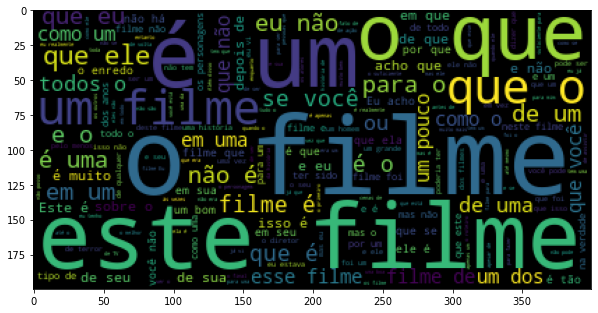

In [39]:
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras)
plt.show()

A imagem mostra várias palavras que não ajudam na análise, há como melhorar a imagem e há muitas palavras que não agregam nenhum valor (como artigo e preposições) e repetidas. Portanto, teremos que dar uma refinada nas seleções de palavras.

In [40]:
nuvem_palavras = WordCloud(width= 800, height= 500,
max_font_size = 110,).generate(todas_palavras)

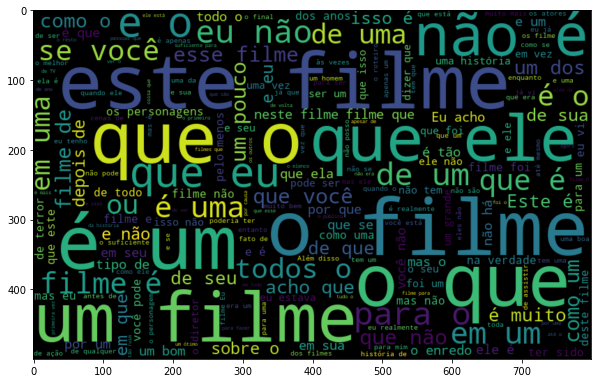

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.show()

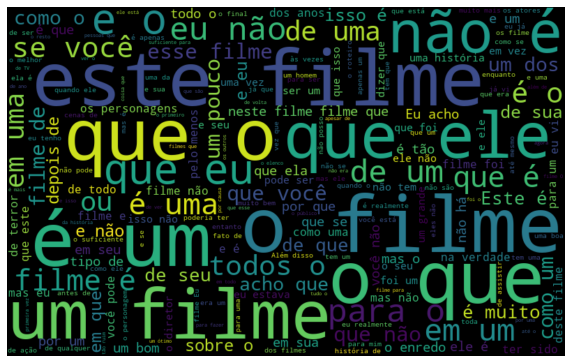

In [42]:
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis("off")
plt.show()

Separando as frases com sentimento negativos de sentimentos positivos:

In [43]:
resenha.query("sentiment == 'pos'")

,id,text_en,text_pt,sentiment,classificacao
12389,12391,I went and saw this movie last night after bei...,Eu fui e vi este filme ontem à noite depois de...,pos,1
12390,12392,Actor turned director Bill Paxton follows up h...,"O diretor do ator, Bill Paxton, segue sua prom...",pos,1
12391,12393,As a recreational golfer with some knowledge o...,Como um jogador de recreio com algum conhecime...,pos,1
12392,12394,"I saw this film in a sneak preview, and it is ...","Eu vi esse filme em uma prévia, e é delicioso....",pos,1
12393,12395,Bill Paxton has taken the true story of the 19...,Bill Paxton levou a verdadeira história do gol...,pos,1
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


In [52]:
# Criando função que vai separar as frases de sentimento neg e pos:

def nuvem_palavras_neg(texto, coluna_texto):
    texto_negativo = texto.query("sentiment=='neg'")
    todas_palavras = ' '.join(texto for texto in texto_negativo[coluna_texto])
    
    nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110,
                              collocations=False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
def nuvem_palavras_pos(texto, coluna_texto):
    texto_positivo = texto.query("sentiment=='pos'")
    todas_palavras = ' '.join(texto for texto in texto_positivo[coluna_texto])
    
    nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110,
                              collocations=False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

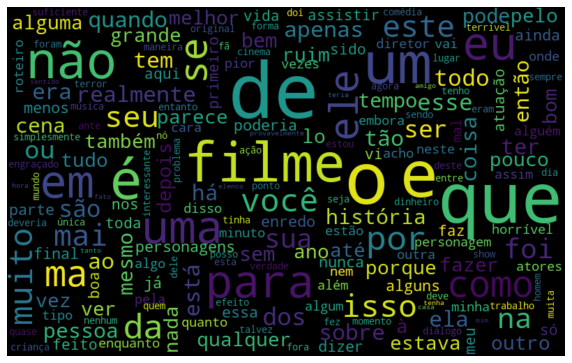

In [49]:
nuvem_palavras_neg(resenha, "text_pt")

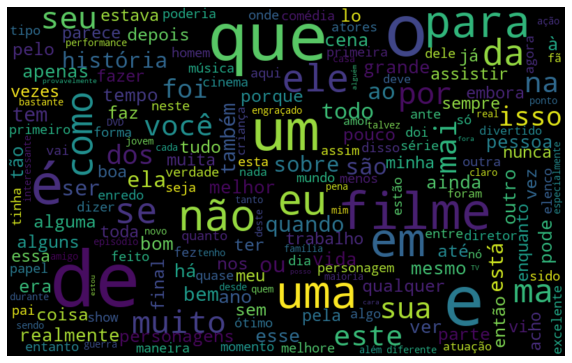

In [53]:
nuvem_palavras_pos(resenha, "text_pt")

## Conhecendo a biblioteca NLTK
 Vizualização das 50, 10 ou 20 primeiras palavras com maior frequencia.
 
 "A tokenização é o processo de receber um texto e separar suas palavras ou pontuação de acordo com um tipo de separação específica, gerando os chamados tokens, que são as partes segregadas daquele texto. Nesta aula usamos como separador o espaço em branco, mas temos outras formas de separar nosso texto."

In [54]:
import nltk

nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Thalita\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Thalita\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Thalita\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Thalita\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\Thalita\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping grammars\basque_grammars.zip.
[nlt

[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\Thalita\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\nonbreaking_prefixes.zip.
[nltk_data]    | Downloading package nps_chat to
[nltk_data]    |     C:\Users\Thalita\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\nps_chat.zip.
[nltk_data]    | Downloading package omw to
[nltk_data]    |     C:\Users\Thalita\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package omw-1.4 to
[nltk_data]    |     C:\Users\Thalita\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package opinion_lexicon to
[nltk_data]    |     C:\Users\Thalita\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\opinion_lexicon.zip.
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     C:\Users\Thalita\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package paradigms to
[nltk_data]    |     C:\Users\Thalita\AppData\Roaming\nltk_data

[nltk_data]    |   Unzipping corpora\verbnet3.zip.
[nltk_data]    | Downloading package webtext to
[nltk_data]    |     C:\Users\Thalita\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\webtext.zip.
[nltk_data]    | Downloading package wmt15_eval to
[nltk_data]    |     C:\Users\Thalita\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping models\wmt15_eval.zip.
[nltk_data]    | Downloading package word2vec_sample to
[nltk_data]    |     C:\Users\Thalita\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping models\word2vec_sample.zip.
[nltk_data]    | Downloading package wordnet to
[nltk_data]    |     C:\Users\Thalita\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package wordnet2021 to
[nltk_data]    |     C:\Users\Thalita\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package wordnet31 to
[nltk_data]    |     C:\Users\Thalita\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package wordnet_ic to
[nltk_data]    |     C:\Users\Th

True

In [55]:
import nltk 
frase = ["um filme bom", "um filme ruim"]
frequencia = nltk.FreqDist(frase)
frequencia

FreqDist({'um filme bom': 1, 'um filme ruim': 1})

Precisa separar as palavras, usa a bibliotecas do [nltk](https://www.nltk.org/) que cria token chamada tokenize

In [56]:
from nltk import tokenize

frase = "Bem vindo ao mundo do PLN!"

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
print(token_frase)

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN!']


In [57]:
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)

In [58]:
frequencia

FreqDist({'de': 417651, 'que': 325070, 'e': 299743, 'o': 244881, 'um': 216410, 'a': 210179, 'é': 192381, 'em': 132778, 'uma': 130888, 'não': 127915, ...})

Para melhorar a visualização vamos por em dataframe:

In [63]:
df_frequencia = pd.DataFrame({"Palavra": list (frequencia.keys()),
                             "Frequência": list(frequencia.values())})

In [64]:
df_frequencia

,Palavra,Frequência
0,Mais,1538
1,uma,130888
2,"vez,",1927
3,o,244881
4,Sr.,1741
...,...,...
348280,"Muppified,",1
348281,inventora,1
348282,"""Union",1
348283,beirar,1


In [71]:
mais_frequentes = df_frequencia.nlargest(columns='Frequência',n=10)
mais_frequentes

,Palavra,Frequência
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


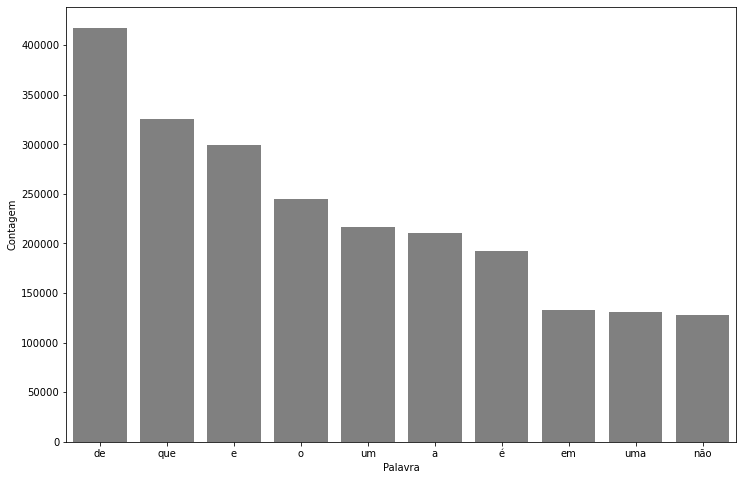

In [72]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data = mais_frequentes, x = "Palavra", y = "Frequência", color = 'gray')
ax.set(ylabel = "Contagem")
plt.show()

#### [Diagrama de Pareto](https://pt.wikipedia.org/wiki/Diagrama_de_Pareto)

O diagrama de Pareto é um gráfico de colunas que ordena as frequências das ocorrências, da maior para a menor, permitindo a priorização dos problemas, procurando levar a cabo o princípio de Pareto (80% das consequências advêm de 20% das causas), isto é, há muitos problemas sem importância diante de outros mais graves.[1] Sua maior utilidade é a de permitir uma fácil visualização e identificação das causas ou problemas mais importantes, possibilitando a concentração de esforços sobre os mesmos. É uma das sete ferramentas da qualidade.[2] Seu propósito não é o de identificar causas. Outras ferramentas, tais como gráficos de controle, gráficos de dispersão e experimentos planejados podem ajudar a identificar as causas.[3]

[como analisar](https://ferramentasdaqualidade.org/diagrama-de-pareto/)

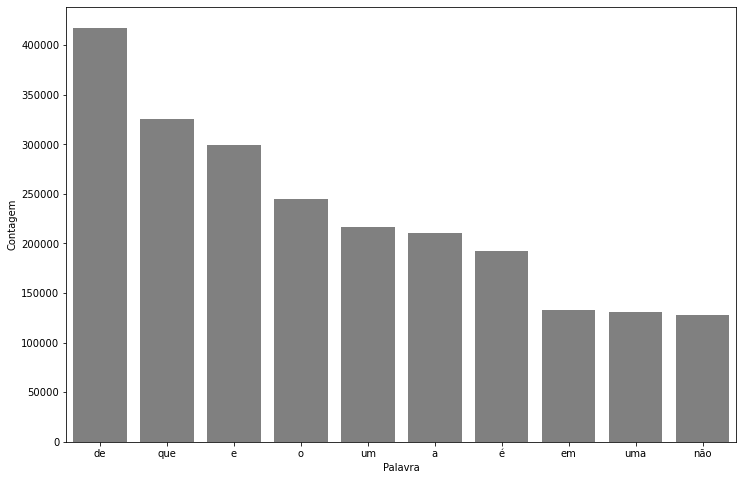

In [73]:
def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                   "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x = "Palavra", y = "Frequência", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()

pareto(resenha, "text_pt", 10)

In [87]:
def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([resenha for resenha in texto[coluna_texto]])
    token_espaco = nltk.tokenize.WhitespaceTokenizer()
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencias = nltk.FreqDist(token_frase)
    df_frequencias = pd.DataFrame({'Palavras': list(frequencias.keys()),
                               'Frequencia': list(frequencias.values())})
    df_frequencias = df_frequencias.nlargest(n=quantidade, columns='Frequencia')

    total = df_frequencias['Frequencia'].sum()
    df_frequencias['Porcentagem'] = df_frequencias['Frequencia'].cumsum() / total * 100

    plt.figure(figsize=(12,8))
    ax = sns.barplot(data=df_frequencias, x='Palavras', y='Frequencia', color='gray')
    ax2 = ax.twinx()
    sns.lineplot(data=df_frequencias, x='Palavras', y='Porcentagem', color='red', sort=False, ax=ax2)
    plt.show()

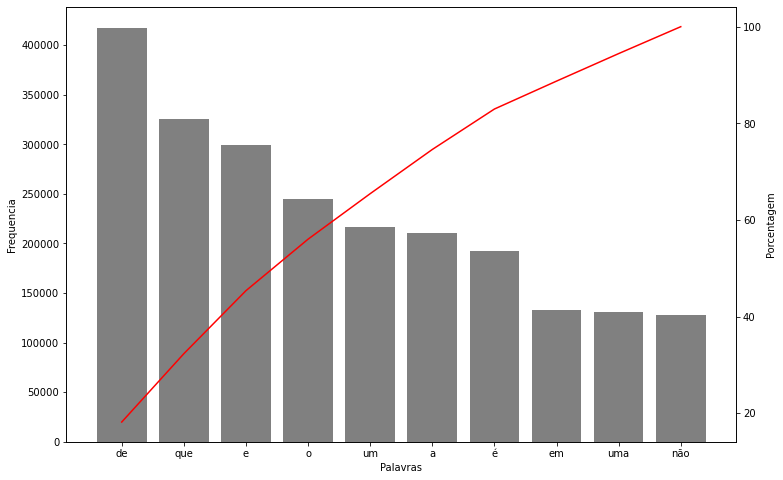

In [88]:
pareto(resenha, "text_pt", 10)

### Começando os tratamentos:

Retirando as palavras que não agregam nada, conhecidas na blibioteca nltk como 'stop words'

As stop words são palavras que não apresentam relevância em determinado contexto e podem ser removidas sem perda semântica da frase. Essa lista não é fixa e universal, podendo ser alterada dependendo do contexto e idioma.

In [89]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

In [90]:
print(palavras_irrelevantes)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

In [91]:
frase_processada = list()

for opiniao in resenha.text_pt:
    nova_frase = list()
    palavra_texto = token_espaco.tokenize(opiniao)
    for palavra in palavra_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha['tratamento_1'] = frase_processada

In [92]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [93]:
classificar_texto(resenha, 'tratamento_1','classificacao')

0.6811160533764659

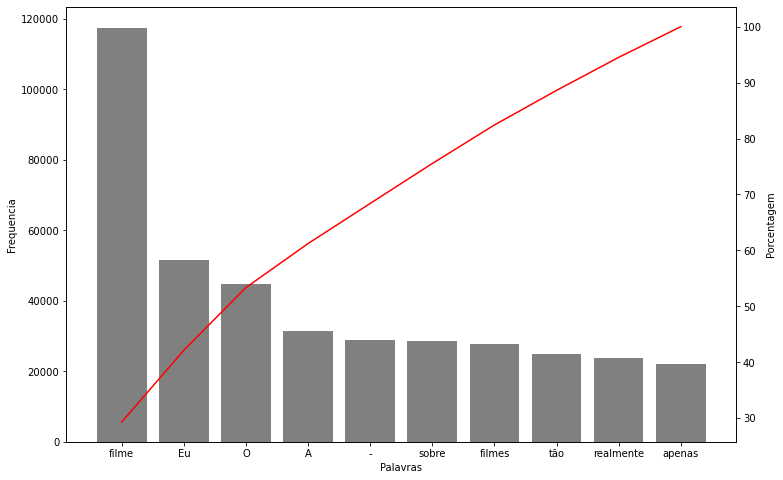

In [94]:
pareto(resenha, "tratamento_1", 10)

#### Referências:

- Curso: [Alura - Linguagem Natural parte 1: NLP com análise de sentimento](https://cursos.alura.com.br/course/introducao-a-nlp-com-analise-de-sentimento)
- [Um guia para NPL - Processamento de Linguagem Natural](https://ilumeo.com.br/todos-posts/2020/06/12/um-guia-para-pnl-processamento-de-linguagem-natural)
- [Sentiment Analysis: Concept, Analysis and Applications](https://towardsdatascience.com/sentiment-analysis-concept-analysis-and-applications-6c94d6f58c17)
- [A friendly guide to NLP: Bag-of-Words with Python example](https://www.analyticsvidhya.com/blog/2021/08/a-friendly-guide-to-nlp-bag-of-words-with-python-example/)